### VAF - FP probability (2023.08.03)

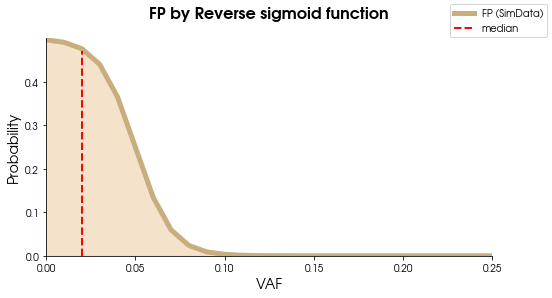

In [1]:
def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 100*x - 5)) * 0.5

if __name__ == "__main__":
    import numpy as np
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt
    
    x = np.linspace(0, 1, 101)
    y = np.array ( [TN_prior_cal(i) for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "FP by Reverse sigmoid function", fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (SimData)", linewidth = 5, color = '#C8AE7D')
    ax.fill_between(x, y, color='#EAC696', alpha=0.5)
    ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] * 1.03, label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.25, 0, 0.5] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()

### FP densitogram (2023.08.03)


======================	1.SimData_1D/n500_100x/decoy/0.0	===============================

======================	1.SimData_1D/n500_100x/decoy/0.1	===============================

======================	1.SimData_1D/n500_100x/lump/0.0	===============================

======================	1.SimData_1D/n500_100x/lump/0.1	===============================


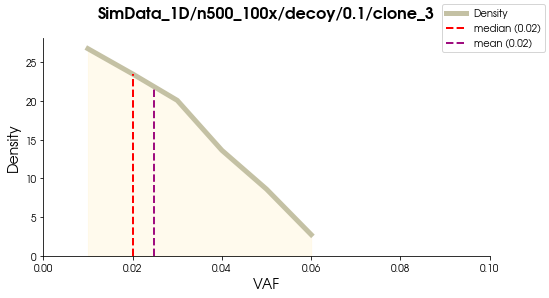

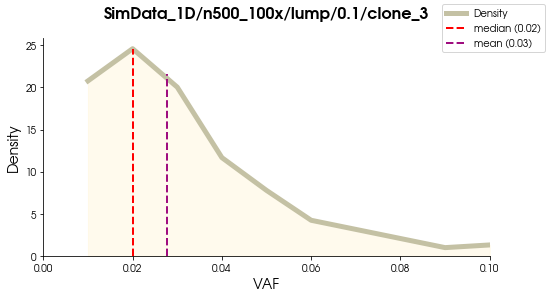

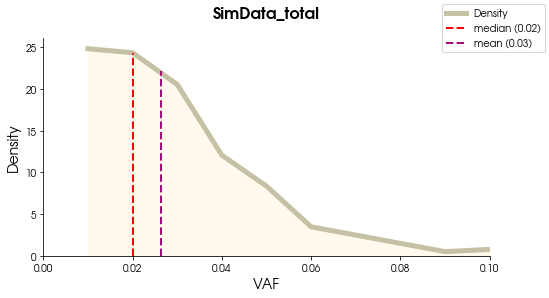

In [39]:
def draw_fp_densitogram (x, TITLE):
    import numpy as np
    from scipy.stats import gaussian_kde
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt

    if len (x) != 0:           # FP = 0 이고 비어있으면 아예 densitogram 안됨
        x = sorted ( np.array (x) )
        kde_function = gaussian_kde( x )
        y = kde_function (x)


        fig, ax = plt.subplots (figsize = (8, 4))
        #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

        ax.set_title ( TITLE, fontsize = 16, fontweight='bold', color='black', pad=20)

        ax.plot (x, y, label = "Density", linewidth = 5, color = '#C4C1A4')
        ax.fill_between(x, y, color='#FFF6DC', alpha=0.5)
        ax.axvline(x = np.median (x),  ymin = 0, ymax = kde_function ( np.median(x) ) [0] / plt.ylim()[1] , label = "median ({})".format ( round ( np.median(x), 2) ), linestyle='--', linewidth=2, color = 'red' )       
        ax.axvline(x = np.mean (x),  ymin = 0, ymax = kde_function ( np.mean(x) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (x), 2) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

        # 축 설정
        ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
        ax.set_ylabel("Density", fontdict = {"fontsize" : 14})
        ax.axis ( [0, 0.1, 0, np.max (y) * 1.05] )

        # Spine 설정
        fig.gca().spines['top'].set_visible(False)
        fig.gca().spines['right'].set_visible(False)
        fig.legend()




if __name__ == "__main__":    
    import os
    import pandas as pd

    kwargs = {}

    NUM_BLOCK_LIST = [1]             # 1, 2, 3
    NUM_MUTATION_LIST = [500]    # 500, 100
    DEPTH_MEAN_LIST = [100]       # 100, 30
    FP_RATIO_LIST = [0.0, 0.1 ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [3 ]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 1]; kwargs["BENCHMARK_START"] = BENCHMARK_LIST[0];  kwargs["BENCHMARK_END"] = BENCHMARK_LIST[1]

    x_total = []
    for NUM_BLOCK in NUM_BLOCK_LIST:
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for DEPTH_MEAN in DEPTH_MEAN_LIST:        
                for SIMDATA in SIMDATA_LIST:
                    for FP_RATIO in FP_RATIO_LIST:
                        print("\n======================\t1.SimData_{}D/n{}_{}x/{}/{}\t===============================".format( NUM_BLOCK ,NUM_MUTATION, DEPTH_MEAN, SIMDATA, FP_RATIO ))            
                        for NUM_CLONE in NUM_CLONE_LIST:
                            x_regional = []
                            for ii in range(kwargs["BENCHMARK_START"],  kwargs["BENCHMARK_END"] + 1):
                                kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" +  str(ii) + "/npvaf.txt"
                                npvaf = pd.read_csv (kwargs["NPVAF_DIR"], sep = "\t",  index_col = 0  )
                                npvaf = npvaf [ npvaf["membership_answer"] == "FP"]
                                for i in range (NUM_BLOCK):
                                    x_regional = x_regional +  list ( npvaf.iloc[:, i] ) 
                                    x_total = x_total +  list ( npvaf.iloc[:, i] ) 
                            draw_fp_densitogram (x_regional, TITLE = "SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) )
    
    draw_fp_densitogram (x_total, TITLE = "SimData_total" )
                                